# Universidad de Buenos Aires
# Deep Learning - Examen
# Octubre 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el Lunes 23 de Octubre a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen OCTUBRE 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dado el grafo de cómputo de la siguiente imagen:

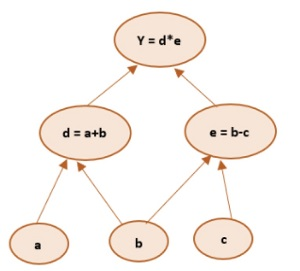

Donde a=1, b=2 y c=3

1. Realizar el paso forward y calcular Y.

2. Realizar el paso backward y calcular el backpropagation para a,b y c:
  
    a. En forma analítica (dy/dx = 0)
  
    b. Aplicando regla de la cadena

    c. Utilizando pytorch

3. Comparar los resultados del punto 2

In [ ]:
# Imports
import numpy as np
import torch

In [ ]:
# inicio de inputs
a = np.random.random()
b = np.random.random()
c = np.random.random()

print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')

### Inciso 1

In [ ]:
# 1 Forward
d = a + b
e = b - c
Y = d*e

print (f'Y = {Y}')

### Inciso 2

#### 2.a)

In [ ]:
# 2_a
# Derivadas Parciales Analitica


dY_da = (b - c)
dY_db = a + 2*b -c
dY_dc = -(a + b)

# Igualanado a 0 las derivadas parciales no se se obtienen
# valores únicos. Queda indeterminado
# b = c = -a

print(f'dY/da = {dY_da}')
print(f'dY/db = {dY_db}')
print(f'dY/dc = {dY_dc}')


#### 2.b)

In [ ]:
# 2_b Derivadas Parciales Regla de la cadena

dY_dd = e # dY/dd
dY_de = d # dY/de

dd_da =  1 # dd/da
dd_db =  1 # dd/db
de_db =  1 # de/db
de_dc = -1 # de/dc

dY_da = dY_dd*dd_da                # dY/da
dY_db = dY_dd*dd_db + dY_de*de_db  # dY/db
dY_dc = dY_de*de_dc                # dY/dc  

print(f'dY/da = {dY_da}')
print(f'dY/db = {dY_db}')
print(f'dY/dc = {dY_dc}')

#### 2.c)

In [ ]:
# 2_c Derivadas Parciales utilizando Pytorch

a = torch.tensor([a], requires_grad=True)
b = torch.tensor([b], requires_grad=True)
c = torch.tensor([c], requires_grad=True)

print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')

In [ ]:
# Forward
d = a + b
e = b - c
Y = d*e

print (f'Y = {Y}')

In [ ]:
external_grad = torch.tensor([1.])
Y.backward(external_grad)

In [ ]:
dY_da = a.grad # dY/da
dY_db = b.grad # dY/db
dY_dc = c.grad # dY/dc 

print(f'dY/da = {dY_da}')
print(f'dY/db = {dY_db}')
print(f'dY/dc = {dY_dc}')

### Inciso 3

En todos los casos las derivadas dan lo mismo

## Ejercicio 2



a) Implemente un modelo de red recurrente con la arquitectura presentada en la imagen. La misma debe tener:


* Como input una señal de 4 canales (4 features)
* 3 capas ocultas con 20 neuronas.
* Tenga como salida una señal de 2 canales (2 features) de igual longitud que la señal de entrada. (ayuda! emplee 2 capas recurrentes independientes)


b) Testeear el modelo con una señal random de longitud 20.

c) Indique el total de parámetros entrenables.



![c](https://drive.google.com/uc?export=view&id=1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W)



Imagen 3 link (https://drive.google.com/file/d/1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W/view?usp=drive_link)



In [ ]:
class RNN_clas(torch.nn.Module):
  def __init__(self, input_size=2, hidden_size=40, num_layers=2, out_fc=5):
    super().__init__()
    self.rnn1 = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, out_fc )

  def forward(self, x):
    x, h = self.rnn1(x)
    o_fc = self.fc(x[:,-1]) # le paso el hidden state final de la rrn1
                      # esto será de largo igual al numero de hidden
                      # tiene sentido pasar el hidden final por que tendrá
                      # la información de la secuencia en entrada ya "almacenada"
    # o_fc_prob = torch.softmax(o_fc, 1)
    return o_fc, o_fc # acá repito la salida ya que mi funcion "teoria"
                                # espera que el modelo arroje 2 salidas.

In [ ]:
def imp_param(model):
  print('-'*84)
  print('PARAMETROS DEL MODELO')
  print('-'*84)
  for name, param in model.named_parameters():
    if param.requires_grad:
      print('Nombre del parámetro: ')
      print(name)
      print('Tamaño del parámetro: ')
      print(param.data.shape)
      print()

In [ ]:
def teoria(model, largo_entrada = 3, batch_size=1):
  print('-'*84)
  print('MODELO')
  print('-'*84)
  print(model)
  imp_param(model)

  # Generamos una entrada aleatoria para ver como responde la red
  # el tamaño de la entrada esa acorde a los tamaños que cargamos antes
  entrada = torch.rand(batch_size, largo_entrada, input_size)
  print('-'*84)
  print('ENTRADA')
  print('-'*84)
  print('entrada shape: ', entrada.shape)
  print(entrada)

  # le agrego la dimension del batch:
  #entrada = entrada[None, :]
  print()
  print('entrada con nuevas dimensiones [batch, Length, nr_features] ')
  print(entrada.shape)

  # Pasamos la entrada a la red
  o, h = model(entrada)
  print('-'*84)
  print('SALIDA')
  print('-'*84)
  print('salida de la red (output) (largo igual al input): ', o.shape)
  print(o)
  print()
  print('hidden red (solo ultimo hidden): ', h.shape)
  print(h)


In [ ]:
input_size= 4
batch_size=1
hidden_size=20
num_layers=3

largo_entrada = 20

model = RNN_clas(input_size, hidden_size, num_layers)
teoria(model, largo_entrada, batch_size)

## Ejercicio 3

Se desea construir un sistema de recomendación de películas. Para esto se cuenta con un dataset de las puntuaciones que los usuarios han asignado a las peliculas disponibles.

Link dataset: https://drive.google.com/file/d/1Og9H-8oqb3_Wo_WOakeAuRR_mwr922Ar/view?usp=sharing

Para verificar la factibilidad del proyecto con datos válidos, se decide utilizar solamente las 200 películas con más votos y los usuarios que han puntuado al menos 100 películas.

1- Analizar el dataset para utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

2- A partir del dataset del punto 1, construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.


In [10]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import numpy as np

### 1.-  Armado del Dataset

In [2]:
df = pd.read_csv('ratings.csv')
print(df['userId'].unique().shape)
print(df['movieId'].unique().shape)
print(df.shape)

(610,)
(9724,)
(100836, 4)


In [3]:
# Filtrado
pelis = df.groupby(['movieId'])['userId'].count().sort_values(ascending=False)[:200].index
df1 = df.groupby(['userId'])['movieId'].count()
usuarios = df1[df1 >= 100].index
data = df[(df['userId'].isin(usuarios)) & (df['movieId'].isin(pelis))]

print(data['userId'].unique().shape)
print(data['movieId'].unique().shape)
print(data.shape)

(248,)
(200,)
(18588, 4)


### 2.- Red

In [6]:
class red(torch.nn.Module):
    def __init__(self, n_input = 1, vocab_size1=50, embedding_dim1=2, vocab_size2=50, embedding_dim2=2):
        super(red, self).__init__()

        self.embeddings1 = torch.nn.Embedding(vocab_size1, embedding_dim1)
        self.embeddings2 = torch.nn.Embedding(vocab_size2, embedding_dim2)
        #self.embeddings = nn.Embedding.from_pretrained(weight, freeze=False)

        self.linear1 = torch.nn.Linear(n_input + embedding_dim1 + embedding_dim2, 8)
        self.act = torch.nn.ReLU()
        #self.act = torch.nn.Tanh()
        self.linear2 = torch.nn.Linear(8, 1)

    def forward(self, peli, usuario):
        embeds1 = self.embeddings1(peli).view((1, -1))
        embeds2 = self.embeddings2(usuario).view((1, -1))
        final_input = torch.cat([embeds1, embeds2], dim=1)
        linear1_out = self.linear1(final_input)
        out = self.act(linear1_out)
        out = self.linear2(out)
        return out

In [7]:
# armamos un diccionario que me mapee el un índex
# para pelis
peli_to_idx = {peliId: i for i, peliId in enumerate(pelis)}
# para usuarios
user_to_idx = {userId: i for i, userId in enumerate(usuarios)}
print('diccionario de vocabulario Pelis')
print(peli_to_idx)
print('diccionario de vocabulario Usuarios')
print(user_to_idx)

diccionario de vocabulario Pelis
{356: 0, 318: 1, 296: 2, 593: 3, 2571: 4, 260: 5, 480: 6, 110: 7, 589: 8, 527: 9, 2959: 10, 1: 11, 1196: 12, 50: 13, 2858: 14, 47: 15, 780: 16, 150: 17, 1198: 18, 4993: 19, 1210: 20, 858: 21, 457: 22, 592: 23, 5952: 24, 2028: 25, 7153: 26, 588: 27, 608: 28, 2762: 29, 380: 30, 32: 31, 364: 32, 1270: 33, 377: 34, 3578: 35, 4306: 36, 1580: 37, 590: 38, 648: 39, 344: 40, 4226: 41, 367: 42, 58559: 43, 6539: 44, 1214: 45, 595: 46, 1036: 47, 165: 48, 500: 49, 1265: 50, 79132: 51, 1197: 52, 6377: 53, 1704: 54, 316: 55, 2628: 56, 1291: 57, 1721: 58, 153: 59, 1136: 60, 597: 61, 293: 62, 1193: 63, 3793: 64, 231: 65, 4886: 66, 10: 67, 1089: 68, 7361: 69, 6874: 70, 1240: 71, 1221: 72, 2329: 73, 34: 74, 1200: 75, 1213: 76, 1682: 77, 8961: 78, 541: 79, 4995: 80, 736: 81, 5349: 82, 1097: 83, 2683: 84, 733: 85, 2716: 86, 1206: 87, 4973: 88, 5445: 89, 1073: 90, 4963: 91, 586: 92, 33794: 93, 1527: 94, 208: 95, 587: 96, 5989: 97, 1968: 98, 185: 99, 5418: 100, 3147: 101, 39

In [ ]:
model = red(n_input = 0, vocab_size1=len(pelis), embedding_dim1=2, vocab_size2=len(usuarios), embedding_dim2=2)
x_y = np.array(data[['movieId', 'userId', 'rating']])
largo = len(x_y)
index_rand = np.random.permutation(largo)
indice = index_rand[23]

peli_i = x_y[indice,0]
user_i = x_y[indice,1]

pelis_idxs = torch.tensor(peli_to_idx[peli_i], dtype=torch.long)
user_idxs = torch.tensor(user_to_idx[user_i], dtype=torch.long)

print(user_idxs)
print(pelis_idxs)
print(largo)
print(len(pelis))
print(len(usuarios))
pred = model(pelis_idxs, user_idxs)

In [11]:
losses = []
loss_function = torch.nn.MSELoss()

device = "cuda" if torch.cuda.is_available() else "cpu"

model = red(n_input = 0, vocab_size1=len(pelis), embedding_dim1=8, vocab_size2=len(usuarios), embedding_dim2=8)
model.load_state_dict(torch.load(os.path.join('./', "embeddings_pelisYusersEmbSize8.pt"), map_location=device))

optimizer = torch.optim.Adam(model.parameters(), lr=0.05)#, momentum=0.1)

emb_partida1 = np.copy(model.embeddings1.weight.detach().numpy())
emb_partida2 = np.copy(model.embeddings2.weight.detach().numpy())

print(emb_partida1)
print(emb_partida2)

[[-1.5015388  -0.82485723  1.5006479  ...  2.8894389   0.3077106
  -2.2640748 ]
 [ 1.2426432  -2.3813283   3.7795808  ... -0.27313164 -0.78889906
   3.038188  ]
 [-1.0111781  -0.8728859   3.0283692  ...  2.920401    1.4007871
   3.101863  ]
 ...
 [-1.7430028  -0.37106723 -0.7467919  ...  3.2730854  -1.2686698
  -0.09846687]
 [-3.1118069   0.36943927  2.284699   ... -1.6405284   0.31531808
   2.828555  ]
 [-0.13524137 -2.4059074   1.2061273  ...  1.5176188   1.9151412
   0.33280653]]
[[ 2.3662786  -0.5738774   1.7295789  ...  1.9978243   0.85782266
  -4.127464  ]
 [ 1.1507858   0.2536357   0.6821599  ... -2.3581467  -0.11424989
   0.6702573 ]
 [ 2.416053    0.78892225 -0.22248049 ... -2.4418473  -0.7555845
  -1.7876318 ]
 ...
 [-0.31733623 -2.3576958  -0.4597136  ...  2.1949444  -0.9887741
  -1.5979538 ]
 [ 0.20921636 -0.92118365  4.1701813  ... -0.39477646 -0.47963858
  -3.8372624 ]
 [ 0.4814139  -1.2661783   1.1761156  ...  4.006718   -1.5443825
  -1.0944862 ]]


In [12]:
# armamos una array con los datos de entrenamiento
x_y = np.array(data[['movieId', 'userId', 'rating']])
print(x_y.shape)

(18588, 3)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
global BEST_VAL
BEST_VAL = 99999
for epoch in range(100):
    total_loss = 0
    largo = len(x_y)
    # armo un vector de indices random para leer
    # mi matriz de datos de forma aleatoria
    index_rand = np.random.permutation(largo)
    for i in range(largo): # barro todo de set de entrenamiento
      # saco el índice de ese vector de indices random
      indice = index_rand[i]
      # saco pelis y users y le paso a idx      
      peli_i = x_y[indice,0]
      user_i = x_y[indice,1]
      pelis_idxs = torch.tensor(peli_to_idx[peli_i], dtype=torch.long).to(device)
      user_idxs = torch.tensor(user_to_idx[user_i], dtype=torch.long).to(device)

      # saco las otras variables
      # x =  torch.tensor([[x_y[indice,1]]], dtype=torch.long)

      # saco el valor deseado
      target = torch.tensor([[x_y[indice,2]]]).to(device)

      # preparo el  modelo (limpio el gradiente)
      model.zero_grad()

      # le paso al modelo la input (pelis y usuarios para embeddings)
      pred = model(pelis_idxs, user_idxs)

      # calculo la loss
      loss = loss_function(pred.float(), target.float())

      # Step 5. Do the backward pass and update the gradient
      loss.backward()
      optimizer.step()

      # Get the Python number from a 1-element Tensor by calling tensor.item()
      total_loss += loss.item()

    losses.append(total_loss) # para cada epoch, guardo la loss
    
    # Guardo el modelo
    direccion = './'    
    if total_loss < BEST_VAL:
      BEST_VAL = total_loss
      #salvado = os.path.join(path, "User/Desktop", "file.txt")
      torch.save(model.state_dict(), os.path.join(direccion, "embeddings_pelisYusersEmbSize8.pt"))
      print('Save Best Model in HISTORY\n')
      # imprimo resultados cada 1 epochs
    if (int(epoch) % 1) == 0:
        print(total_loss/largo*100)
        # print(model.embeddings.weight[word_to_ix[1]])
        # print(model.linear1.weight[0])
#print(losses)  # The loss decreased every iteration over the training data!
plt.plot(np.array(losses)/largo*100)
plt.show()

In [ ]:
import os
direccion = './'
global BEST_VAL
#if TRAIN_SCRATCH and avg_loss < BEST_VAL:
#BEST_VAL = avg_loss
#salvado = os.path.join(path, "User/Desktop", "file.txt")
torch.save(model.state_dict(), os.path.join(direccion, "embeddings_pelisYusers.pt"))
print('Save Best Model in HISTORY\n')

In [ ]:
model.load_state_dict(torch.load(os.path.join(direccion, "embeddings_pelisYusers.pt"), map_location=device))

In [24]:
data['userId'].unique()

array([  1,   4,   6,   7,  10,  15,  17,  18,  19,  20,  21,  22,  23,
        24,  27,  28,  32,  33,  39,  40,  41,  42,  43,  45,  47,  50,
        51,  52,  57,  58,  59,  62,  63,  64,  66,  68,  73,  74,  76,
        80,  82,  83,  84,  89,  91,  95, 100, 103, 104, 105, 109, 111,
       113, 115, 117, 119, 122, 125, 129, 132, 135, 136, 137, 139, 140,
       141, 144, 153, 156, 160, 166, 167, 169, 177, 181, 182, 184, 186,
       187, 195, 198, 199, 200, 201, 202, 210, 212, 216, 217, 219, 220,
       221, 222, 226, 230, 232, 233, 234, 239, 240, 246, 247, 249, 254,
       256, 260, 263, 265, 266, 268, 274, 275, 279, 280, 282, 286, 287,
       288, 290, 292, 294, 298, 301, 304, 305, 306, 307, 308, 309, 312,
       313, 314, 317, 318, 322, 325, 326, 328, 330, 331, 332, 334, 339,
       346, 351, 352, 354, 356, 357, 362, 365, 367, 368, 369, 372, 373,
       376, 377, 380, 381, 382, 385, 387, 391, 393, 405, 408, 409, 410,
       411, 412, 414, 419, 420, 424, 425, 428, 432, 434, 436, 43

In [26]:
data['movieId'].unique()

array([    1,     6,    47,    50,   110,   223,   231,   260,   296,
         316,   349,   356,   367,   457,   480,   500,   527,   590,
         592,   593,   608,   648,   733,   736,   780,   919,  1073,
        1080,  1089,  1097,  1136,  1196,  1197,  1198,  1206,  1208,
        1210,  1213,  1214,  1219,  1220,  1222,  1240,  1258,  1265,
        1270,  1291,  1517,  1580,  1617,  1732,  2012,  2028,  2115,
        2174,  2329,  2502,  2571,  2617,  2628,  2716,  2797,  2858,
        2916,  2959,  2987,  2997,  3147,  3578,  3793,    21,    32,
         357,   539,   588,   595,   904,   912,  1259,  1391,  1704,
        1923,  1968,  2324,  2683,  2762,  2791,  3897,  3996,  4027,
        4226,  4896,     2,    10,    16,    19,    34,    95,   104,
         141,   150,   153,   161,   165,   185,   208,   253,   288,
         292,   293,   318,   329,   339,   344,   364,   377,   380,
         410,   434,   454,   587,   589,   597,   750,   924,  1101,
        1246,  1584,

In [30]:
model.to(device)
pelis_idxs = torch.tensor(peli_to_idx[47], dtype=torch.long).to(device)
user_idxs = torch.tensor(user_to_idx[15], dtype=torch.long).to(device)
model(pelis_idxs,user_idxs)

tensor([[4.1643]], device='cuda:0', grad_fn=<AddmmBackward0>)